 ### SPRINT 5 ########################################

## PLAYER PROFILE AND MARKET VALUE 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r"Football_Data_Merged_Cleaned.csv")
data

,appearance_id,game_id,player_id,date_x,player_name_x,competition_id_x,yellow_cards,red_cards,goals,assists,...,country_of_birth,date_of_birth,sub_position,position_y,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name
0,2222536_1321,2222536.0,1321,2012-08-26 00:00:00,Jermaine Jones,L1,1.0,0.0,0.0,1.0,...,Germany,1981-11-03,Defensive Midfield,Midfield,both,184.0,1000000.0,8000000.0,2024-12-31,Wasserman
1,2231391_1321,2231391.0,1321,2012-09-01 00:00:00,Jermaine Jones,L1,0.0,0.0,1.0,0.0,...,Germany,1981-11-03,Defensive Midfield,Midfield,both,184.0,1000000.0,8000000.0,2024-12-31,Wasserman
2,2231391_1321,2231391.0,1321,2012-09-01 00:00:00,Jermaine Jones,L1,0.0,0.0,1.0,0.0,...,Germany,1981-11-03,Defensive Midfield,Midfield,both,184.0,1000000.0,8000000.0,2024-12-31,Wasserman
3,2231397_1321,2231397.0,1321,2012-09-28 00:00:00,Jermaine Jones,L1,1.0,0.0,0.0,0.0,...,Germany,1981-11-03,Defensive Midfield,Midfield,both,184.0,1000000.0,8000000.0,2024-12-31,Wasserman
4,2231397_1321,2231397.0,1321,2012-09-28 00:00:00,Jermaine Jones,L1,1.0,0.0,0.0,0.0,...,Germany,1981-11-03,Defensive Midfield,Midfield,both,184.0,1000000.0,8000000.0,2024-12-31,Wasserman
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4649,2224542_119169,2757218.0,795738,2016-07-20 12:00:00,Fabian Johnson,L1,0.0,0.0,0.0,0.0,...,United States,2003-08-26,Attacking Midfield,Midfield,right,175.0,4500000.0,4500000.0,2027-06-30,Wasserman
4650,2224542_119169,2757218.0,796429,2016-07-20 12:00:00,Fabian Johnson,L1,0.0,0.0,0.0,0.0,...,United States,2003-11-18,Right-Back,Defender,right,185.0,1500000.0,3000000.0,2025-12-31,CAA Stellar
4651,2224542_119169,2757218.0,860812,2016-07-20 12:00:00,Fabian Johnson,L1,0.0,0.0,0.0,0.0,...,United States,2002-04-22,Left Winger,Attack,right,182.0,350000.0,350000.0,2026-06-30,FGM
4652,2224542_119169,2757218.0,971613,2016-07-20 12:00:00,Fabian Johnson,L1,0.0,0.0,0.0,0.0,...,United States,2000-06-21,Defensive Midfield,Midfield,right,193.0,150000.0,150000.0,2026-05-31,Wasserman


In [5]:
data.columns

Index(['player_id', 'name', 'last_season', 'current_club_id', 'player_code',
       'country_of_birth', 'date_of_birth', 'sub_position', 'position_x',
       'foot', 'height_in_cm', 'market_value_in_eur',
       'highest_market_value_in_eur', 'contract_expiration_date', 'agent_name',
       'game_lineups_id', 'game_id_x', 'type_x', 'number', 'player_name_x',
       'team_captain', 'position_y', 'appearance_id', 'game_id_y', 'date_x',
       'player_name_y', 'competition_id_x', 'yellow_cards', 'red_cards',
       'goals', 'assists', 'minutes_played', 'game_event_id', 'date_y',
       'game_id', 'minute', 'type_y', 'description', 'player_in_id',
       'player_assist_id', 'competition_id_y', 'season', 'round', 'date',
       'home_club_goals', 'away_club_goals', 'home_club_position',
       'away_club_position', 'home_club_manager_name',
       'away_club_manager_name', 'stadium', 'attendance', 'referee',
       'home_club_name', 'away_club_name', 'aggregate', 'competition_type'],
      

## BUSINESS OBJECTIVES QUESTIONS ON PLAYER PROFILE AND MAERKET VALUE        ######################################

#  BUSINESS OBJECTIVE QUESTION :  How do a player's  performance metrics influence their market value?

Model Evaluation Metrics:
Mean Squared Error (MSE): 50975579528220.164
Root Mean Squared Error (RMSE): 7139718.448805959
Mean Absolute Error (MAE): 5275070.585616219
R² Score: 0.00022935280670433045


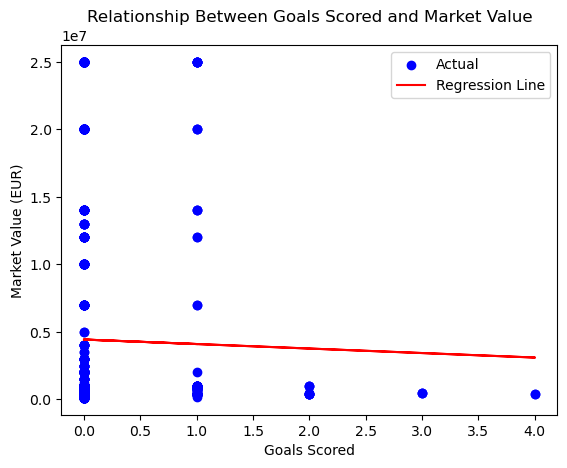

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, r2_score
import matplotlib.pyplot as plt


# Select a single feature (e.g., 'goals') and target
X = data[['goals']]  # Independent variable 
y = data['market_value_in_eur']  # Dependent variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the simple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,y_pred)
r2= r2_score(y_test,y_pred)

print("Model Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")
# Visualization of actual vs predicted market values
plt.scatter(X_test, y_test, label="Actual", color="blue")
plt.plot(X_test, y_pred, color="red", label="Regression Line")  # Regression line
plt.xlabel("Goals Scored")
plt.ylabel("Market Value (EUR)")
plt.title("Relationship Between Goals Scored and Market Value")
plt.legend()
plt.show()


# BUSINESS OBJECTIVE 2:HOW DOES THE HIGHEST MARKET VALUE IMPACT THEIR CURRENT MARKET VALUE ?

MSE:  10426098500154.365
RMSE:  3228946.9645930026
MAE:  2236532.6770288306
The R2 score of the model is:  0.7868729406735644
Intercept:  [-322484.94626566]
Slope:  [[0.46697079]]


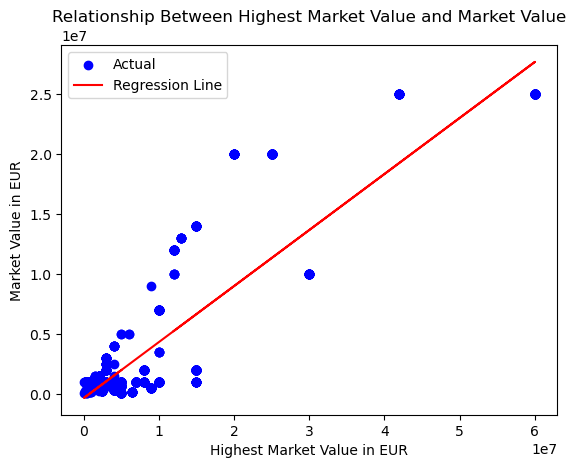

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Assuming new_df is your dataframe
# Define X and Y
X= data[['highest_market_value_in_eur']]  # Independent variable (features)
y = data[['market_value_in_eur']]  # Dependent variable (target)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=41)

# Build the Linear Regression model
model1 = LinearRegression()
model1.fit(X_train, y_train)

# Predicting the values
predicted_y1 = model1.predict(X_test)

# Model evaluation
MSE1 = mean_squared_error(y_test, predicted_y1)
MAE1 = mean_absolute_error(y_test, predicted_y1)
R2_score1 = r2_score(y_test, predicted_y1)

# Printing evaluation metrics
print("MSE: ", MSE1)
print("RMSE: ", np.sqrt(MSE1))
print("MAE: ", MAE1)
print("The R2 score of the model is: ", R2_score1)

# Printing the intercept and coefficients
print("Intercept: ", model1.intercept_)
print("Slope: ", model1.coef_)

# Visualizing the results
plt.scatter(X_test, y_test, label="Actual", color="blue")
plt.plot(X_test1, predicted_y1, label="Regression Line", color="red")
plt.xlabel("Highest Market Value in EUR")
plt.ylabel("Market Value in EUR")
plt.title("Relationship Between Highest Market Value and Market Value")
plt.legend()
plt.show()


In [13]:
data.columns

Index(['appearance_id', 'game_id', 'player_id', 'date_x', 'player_name_x',
       'competition_id_x', 'yellow_cards', 'red_cards', 'goals', 'assists',
       'minutes_played', 'game_event_id', 'date_y', 'minute', 'type_x',
       'description', 'player_in_id', 'player_assist_id', 'game_lineups_id',
       'type_y', 'number', 'player_name_y', 'team_captain', 'position_x',
       'competition_id_y', 'season', 'round', 'date', 'home_club_goals',
       'away_club_goals', 'home_club_position', 'away_club_position',
       'home_club_manager_name', 'away_club_manager_name', 'stadium',
       'attendance', 'referee', 'home_club_name', 'away_club_name',
       'aggregate', 'competition_type', 'name', 'last_season',
       'current_club_id', 'player_code', 'country_of_birth', 'date_of_birth',
       'sub_position', 'position_y', 'foot', 'height_in_cm',
       'market_value_in_eur', 'highest_market_value_in_eur',
       'contract_expiration_date', 'agent_name'],
      dtype='object')

 ## BUSINESS OBJECTIVE QUESTION: Predict which player has highest market value using career statistics.

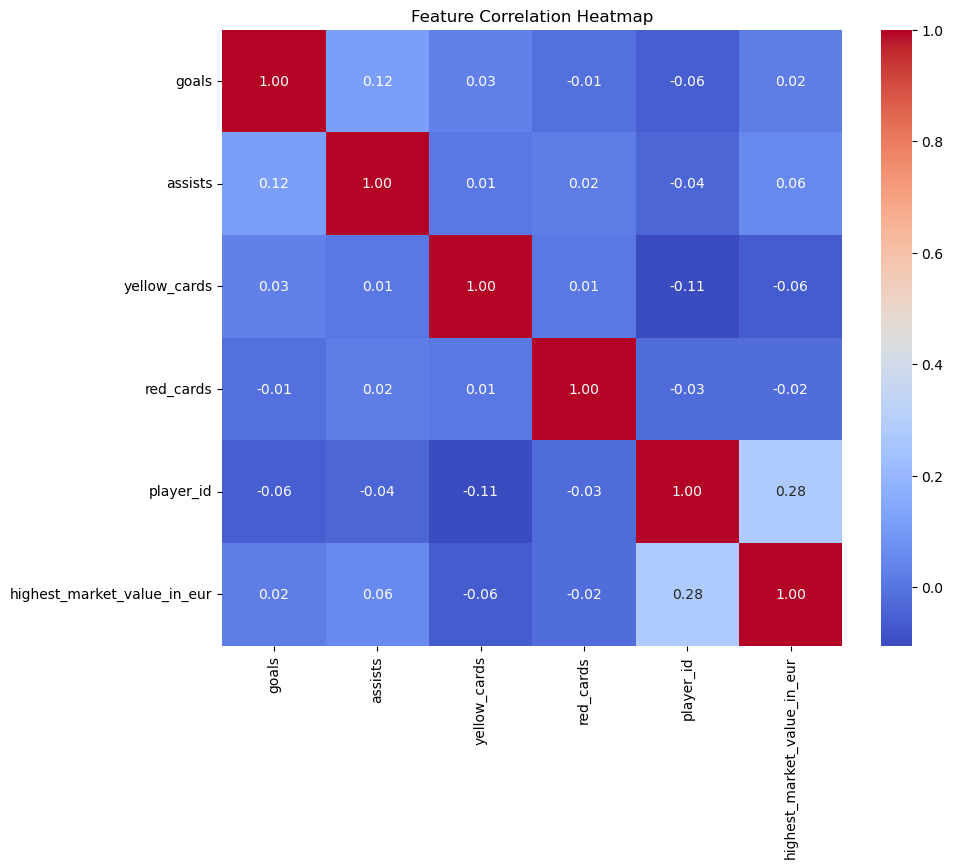

Model Evaluation Metrics with player_id included:
Mean Squared Error (MSE): 7615456260508.001
Root Mean Squared Error (RMSE): 2759611.6140696323
Mean Absolute Error (MAE): 1877296.1067729995
R² Score: 0.8506400573626562

Top Players with Highest Predicted Market Value:
      player_id  Predicted_Market_Value
3196     315779            2.745184e+07
3213     315779            2.745184e+07
3253     315779            2.743498e+07
3359     315779            2.743498e+07
3179     315779            2.743498e+07
...         ...                     ...
1192      39897           -1.241135e+06
1212      39897           -1.241135e+06
279        4746           -1.547078e+06
1196      39897           -1.571175e+06
1200      39897           -1.588035e+06

[931 rows x 2 columns]


In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


features = ['goals','assists','yellow_cards','red_cards','player_id','highest_market_value_in_eur']
X = data[features]
y = data['market_value_in_eur']

# Check the assumption for the existence of multicollinearity among independent features
plt.figure(figsize=(10, 8))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation Metrics with player_id included:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")
# View the predictions along with player_id
results = X_test.copy()
results['Predicted_Market_Value'] = y_pred
sorted_results = results.sort_values(by='Predicted_Market_Value', ascending=False)

# Display top players
print("\nTop Players with Highest Predicted Market Value:")
print(sorted_results[['player_id','Predicted_Market_Value']])



In [ ]:
INTERPRETATION : R-squared (0.85) indicates that approximately  of the variance in the dependent variable (likely "Current Market Value") can be explained by the independent variables in the model. This suggests a good fit of the model to the data.